# Abhilash Sharma
Home work 1
CIN-306656511

In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve, auc

df=pd.DataFrame()

df=pd.read_csv("Cancer.csv")

In [126]:
df

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Malignant_Cancer
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
5,8,10,10,8,7,10,9,7,1,1
6,1,1,1,1,2,10,3,1,1,0
7,2,1,2,1,2,1,3,1,1,0
8,2,1,1,1,2,1,1,1,5,0
9,4,2,1,1,2,1,2,1,1,0


In [127]:
feat_col=['Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses']

X=df[feat_col]
print(X)
y=df['Malignant_Cancer']
print(y)

     Clump_Thickness  Uniformity_of_Cell_Size  Uniformity_of_Cell_Shape  \
0                  5                        1                         1   
1                  5                        4                         4   
2                  3                        1                         1   
3                  6                        8                         8   
4                  4                        1                         1   
5                  8                       10                        10   
6                  1                        1                         1   
7                  2                        1                         2   
8                  2                        1                         1   
9                  4                        2                         1   
10                 5                        3                         3   
11                 8                        7                         5   
12                 7     

In [128]:
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size=0.3,random_state=2)

my_DecisionTree = DecisionTreeClassifier(random_state=2)
my_DecisionTree.fit(X_train,y_train)
y_pre_dt=my_DecisionTree.predict(X_test)
acc_dt=accuracy_score(y_test,y_pre_dt)
print(acc_dt)
dt_prob=my_DecisionTree.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_prob)

0.8666666666666667


In [134]:
df.size
print(bootstrap_size)
y_pre_boot=[]
for i in range(0,28):
    bootstrap_size=0.8*df.size
    bootstrap_s=int(bootstrap_size)
    X_bag,y_bag=resample(X_train,y_train, n_samples=bootstrap_s , random_state=i , replace = True)
    Base_DecisionTree = DecisionTreeClassifier(random_state=2)
    Base_DecisionTree.fit(X_bag,y_bag)
    y_pre_boot.append(Base_DecisionTree.predict(X_test))
final_predict=VotingClassifier(estimators=[y_pre_boot],voting="hard",flatten_transform=True)
final_predict.fit(X_test,y_test)
final_predict1=final_predict.predict(X_test)
acc_bdt=accuracy_score(y_test,final_predict1)

1200.0


ValueError: too many values to unpack (expected 2)

In [130]:
from sklearn.ensemble import AdaBoostClassifier
my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)
my_AdaBoost.fit(X_train,y_train)
y_pre_ada=my_AdaBoost.predict(X_test)
acc_ada=accuracy_score(y_test,y_pre_ada)
print(acc_ada)
ada_prob=my_AdaBoost.predict_proba(X_test)[:,1]
fpr_ada, tpr_ada, _ = roc_curve(y_test, ada_prob)

0.9555555555555556


In [131]:
from xgboost import XGBClassifier
my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2)
my_XGBoost.fit(X_train,y_train)
y_pre_xg=my_XGBoost.predict(X_test)
acc_xg=accuracy_score(y_test,y_pre_xg)
print(acc_xg)
xg_prob=my_XGBoost.predict_proba(X_test)[:,1]
fpr_xg, tpr_xg, _ = roc_curve(y_test, xg_prob)

0.9555555555555556


C:\Users\Abhilash\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [132]:
rd_forest=RandomForestClassifier(n_estimators=29,bootstrap=True,random_state=2)

rd_forest.fit(X_train,y_train)
pd_rd_forest=rd_forest.predict(X_test)

acc_rd_forest=accuracy_score(y_test,pd_rd_forest)
rd_prob=rd_forest.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rd_prob)
print(acc_rd_forest)

0.9555555555555556


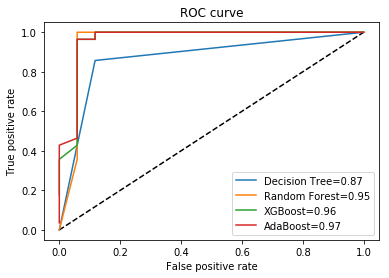

In [133]:
import matplotlib.pyplot as plt

roc_aucdt = auc(fpr_dt, tpr_dt)
roc_aucrf = auc(fpr_rf, tpr_rf)
roc_aucxg = auc(fpr_xg, tpr_xg)
roc_aucada = auc(fpr_ada, tpr_ada)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree=%0.2f'% (roc_aucdt))
plt.plot(fpr_rf, tpr_rf, label='Random Forest=%0.2f'% (roc_aucrf))
plt.plot(fpr_xg, tpr_xg, label='XGBoost=%0.2f'% (roc_aucxg))
plt.plot(fpr_ada, tpr_ada, label='AdaBoost=%0.2f'% (roc_aucada))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# a) AdaBoost gives the best AUC

# b) AdaBoost,XGBoost and Random forest gives best accuracy

# c) Random Forest Gives best FPR